In [1]:
import sys
sys.path.append('../src/')

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from benchmark.tools import *
from benchmark.utils import tf_to_image_faces

import choke_point_dataset
import wider_dataset

In [2]:
test = tfds.load('choke_point', split=['test'])

<IPython.core.display.Javascript object>


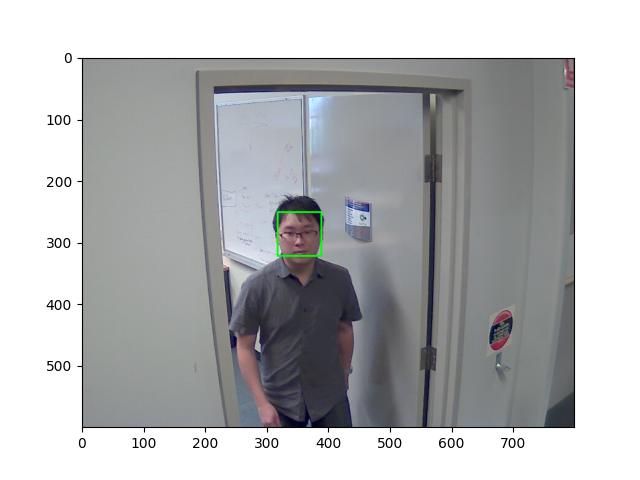

In [3]:
for dataset in test:
    for sample in dataset.take(1):
        sequence = sample['sequences']

        filenames = sequence['image/filename']
        images = sequence['image']
        faces = sequence['face']
        
        fig = plt.figure()
        frames = []
        
        for i in range(len(filenames)):
            tf_obj = {
                'image': images[i],
                'faces': {'bbox': [faces[i]]},
                'image/filename': filenames[i],
            }

            image_faces = tf_to_image_faces(tf_obj)

            for face in image_faces.faces:
                b = face.box
                cv2.rectangle(image_faces.img, (b.x1, b.y1), (b.x2, b.y2), (0, 255, 0), 2)
            
            im = plt.imshow(image_faces.img, animated=True)
            frames.append([im])
        
        ani = animation.ArtistAnimation(fig, frames, interval=25, blit=True, repeat_delay=0)
        plt.show()